# Machine Learning

## Topic: Wine Quality Predictor (Classification)

***<font color='red'>NOTE :</font> This notebook is where the data was analyzed and the predictive models were built for the app. For App source code, click blue text below :*** <br><br>
> **[Source Code](https://github.com/ChrisF03/Streamlit-Apps/blob/main/app_2_wine_classifier/wine-app.py)**

## Introduction

&emsp;Vinho Verde refers to Portuguese wine that originated in the historic Minho province in the far north of the country. The name means "green wine," but translates as "young wine", with wine being released three to six months after the grapes are harvested. They may be red, white, or rosé, and they are usually consumed soon after bottling. 
<br>
<br>
&emsp;In this project we look at two datasets related to red and white Vinho Verde wine samples, from the north of Portugal. Both datasets will be combined into one for easier analysis and the goal will be to create a predictive model for wine quality adn type based on physicochemical tests. <br><br>

This data is publicly available for research purposes at the UC Irvine Machine Learning Repository and can be found here : 
> **[DATASETS](https://archive.ics.uci.edu/ml/datasets/wine+quality)**.

## Required Libraries ... 

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
import shap
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

from sklearn.linear_model import LogisticRegression

from sklearn.svm import SVC

from sklearn.tree import DecisionTreeClassifier

from sklearn.neighbors import KNeighborsClassifier

import warnings
%load_ext watermark

In [2]:
warnings.filterwarnings("ignore")

## Datasets 

### Red Wine Data ... 

In [3]:
red = pd.read_csv('winequality-red.csv')
red.insert(loc = 0,
          column = 'type',
          value = 'Red')
red.head(3)

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,Red,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,Red,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,Red,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5


### White Wine Data ... 

In [4]:
white = pd.read_csv('winequality-white.csv')
white.insert(loc = 0,
            column = 'type',
            value = 'White',)
white.head(3)

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,White,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,White,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,White,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6


### Combining the Datasets ...

In [5]:
types = [red, white]
wine = pd.concat(types)
wine.reset_index(drop = True, inplace = True)

## Descriptive Analytics

In [6]:
wine.isnull().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [7]:
wine.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
fixed acidity,6497.0,7.215307,1.296434,3.80000,6.40000,7.00000,7.70000,15.90000
volatile acidity,6497.0,0.339666,0.164636,0.08000,0.23000,0.29000,0.40000,1.58000
citric acid,6497.0,0.318633,0.145318,0.00000,0.25000,0.31000,0.39000,1.66000
residual sugar,6497.0,5.443235,4.757804,0.60000,1.80000,3.00000,8.10000,65.80000
chlorides,6497.0,0.056034,0.035034,0.00900,0.03800,0.04700,0.06500,0.61100
free sulfur dioxide,6497.0,30.525319,17.749400,1.00000,17.00000,29.00000,41.00000,289.00000
total sulfur dioxide,6497.0,115.744574,56.521855,6.00000,77.00000,118.00000,156.00000,440.00000
density,6497.0,0.994697,0.002999,0.98711,0.99234,0.99489,0.99699,1.03898
pH,6497.0,3.218501,0.160787,2.72000,3.11000,3.21000,3.32000,4.01000
sulphates,6497.0,0.531268,0.148806,0.22000,0.43000,0.51000,0.60000,2.00000


## Exploratory Analytics 

### Correlation Plots 

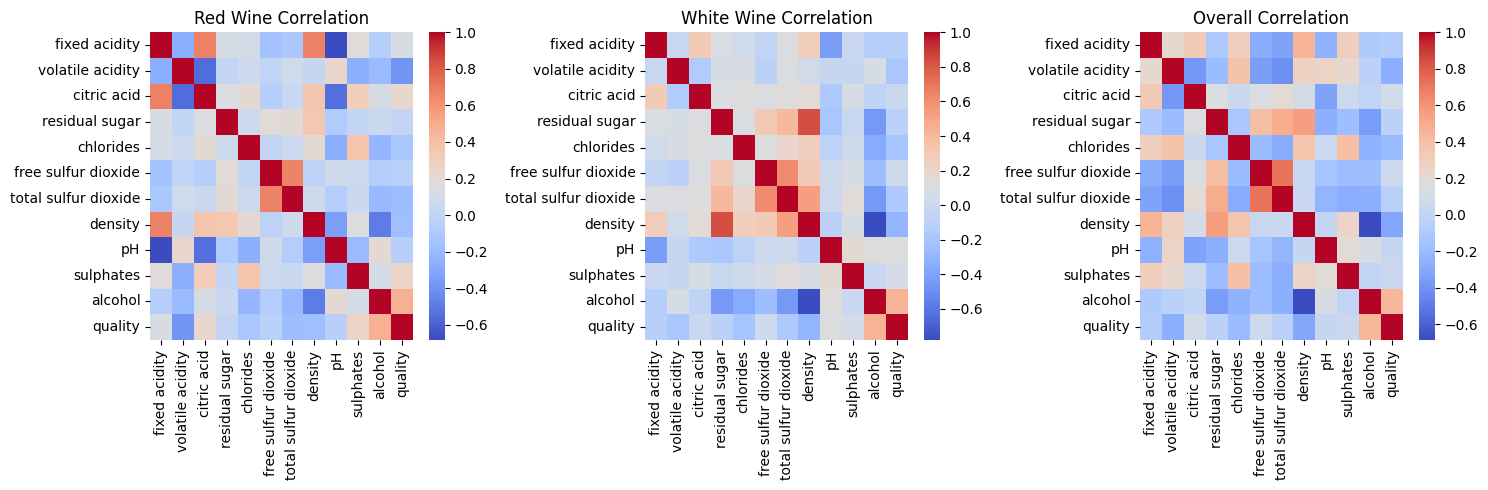

In [8]:
fig = plt.figure(figsize=(15,5))
grid = fig.add_gridspec(1,3)

ax0 = fig.add_subplot(grid[0,0])
sns.heatmap(red.corr(), cmap='coolwarm', annot=False, ax=ax0)
ax0.set_title('Red Wine Correlation')

ax1 = fig.add_subplot(grid[0,1])
sns.heatmap(white.corr(), cmap='coolwarm', annot=False, ax=ax1)
ax1.set_title('White Wine Correlation')

ax2 = fig.add_subplot(grid[0,2])
sns.heatmap(wine.corr(), cmap='coolwarm', annot=False, ax=ax2)
ax2.set_title('Overall Correlation')

plt.tight_layout()

The variable with the highest correlation to the quality score is 'alcohol' across all three dataframes. The weakest correlation overall appears to be density. 

### By Type 

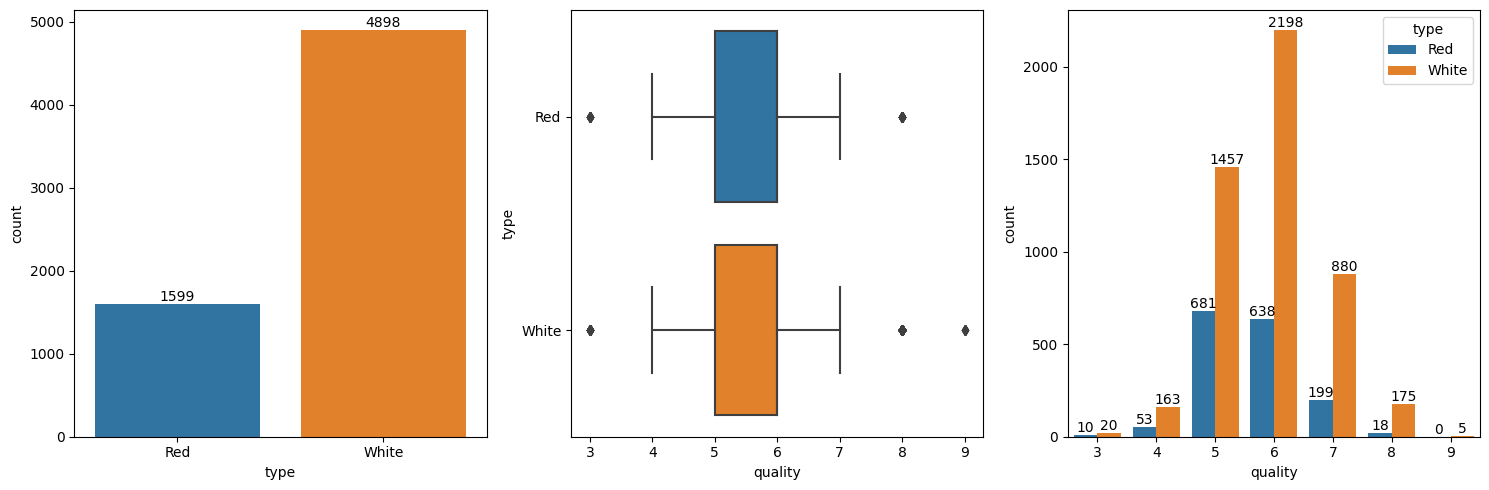

In [9]:
fig = plt.figure(figsize=(15,5))
grid = fig.add_gridspec(1,3)

ax0 = fig.add_subplot(grid[0,0])
sns.countplot(data=wine, x='type', ax=ax0)
ax0.bar_label(ax0.containers[0])

ax1 = fig.add_subplot(grid[0,1])
sns.boxplot(data=wine, x="quality", y='type', ax=ax1)

ax2 = fig.add_subplot(grid[0,2])
sns.countplot(data=wine, x="quality", hue="type", ax=ax2)
for container in ax2.containers:
    ax2.bar_label(container)

plt.tight_layout()

* In the charts above, we learn that the overwhelming majority of the samples in the dataset is white wine, totaling just a little over three times the amount of white wine. 
* The median score between the two wine types is between 5 and 6, with the highest scores being 9 and 8 for white and red wine, respectively. The lowest for both is a score of 3. 
* The majority of red wines had a quality score of 5, while the majority of white wines had a score of 6. 

#### Red Wine Distributions

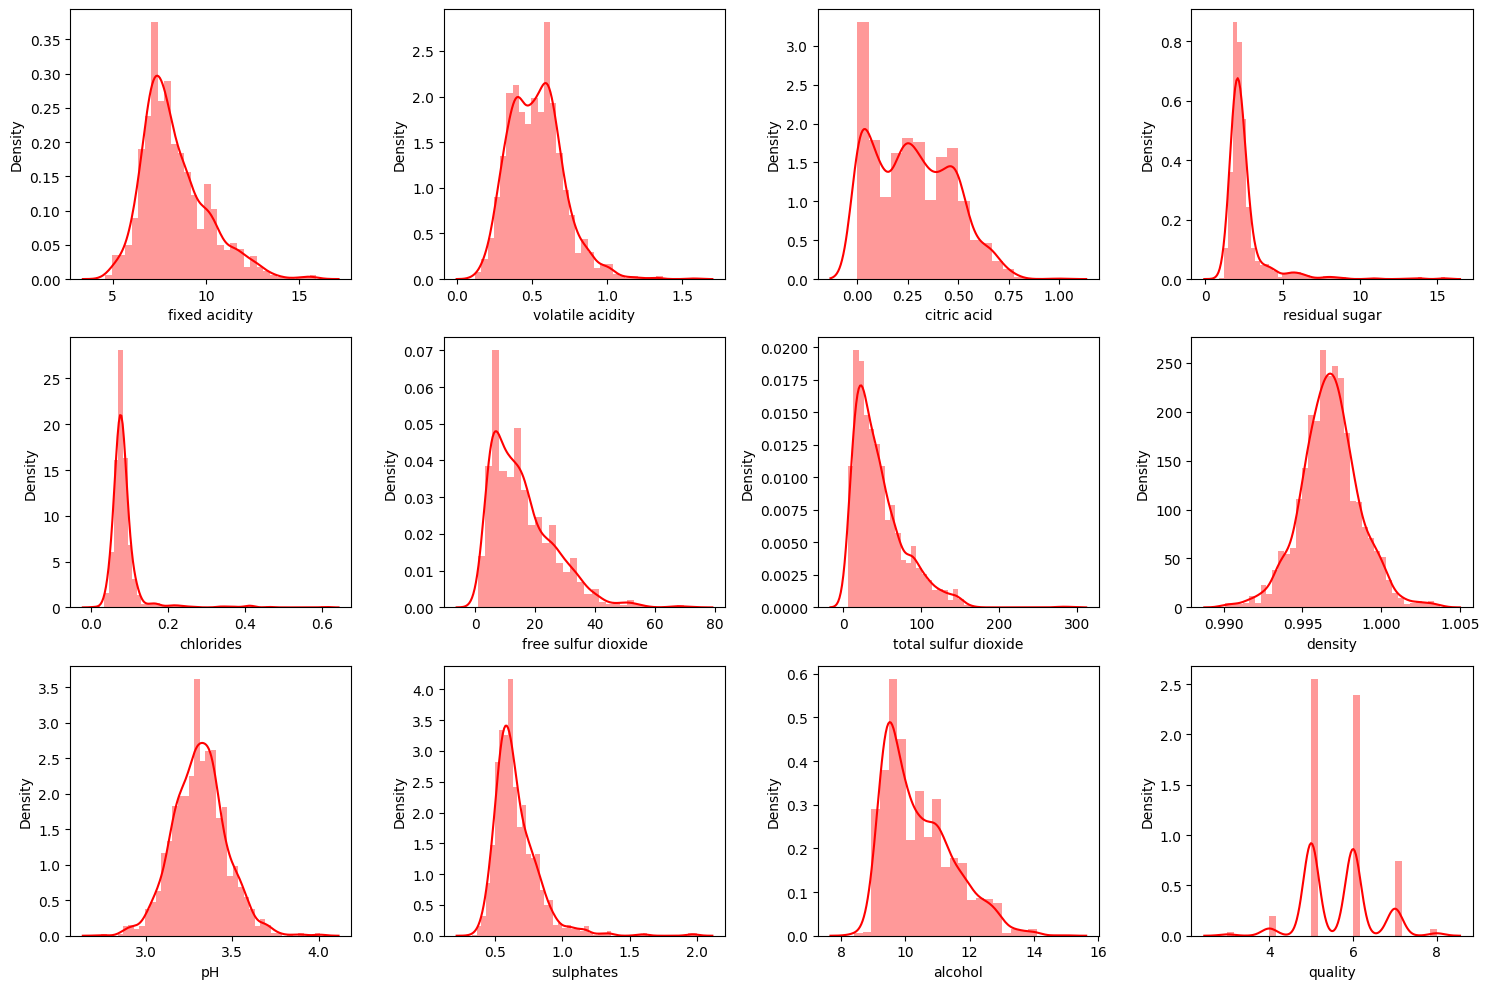

In [10]:
plt.figure(figsize = (15,10))

for i in range(1,13):
    plt.subplot(3,4,i)
    sns.distplot(red[red.columns[i]],color='red')
    plt.tight_layout()

#### White Wine Distributions 

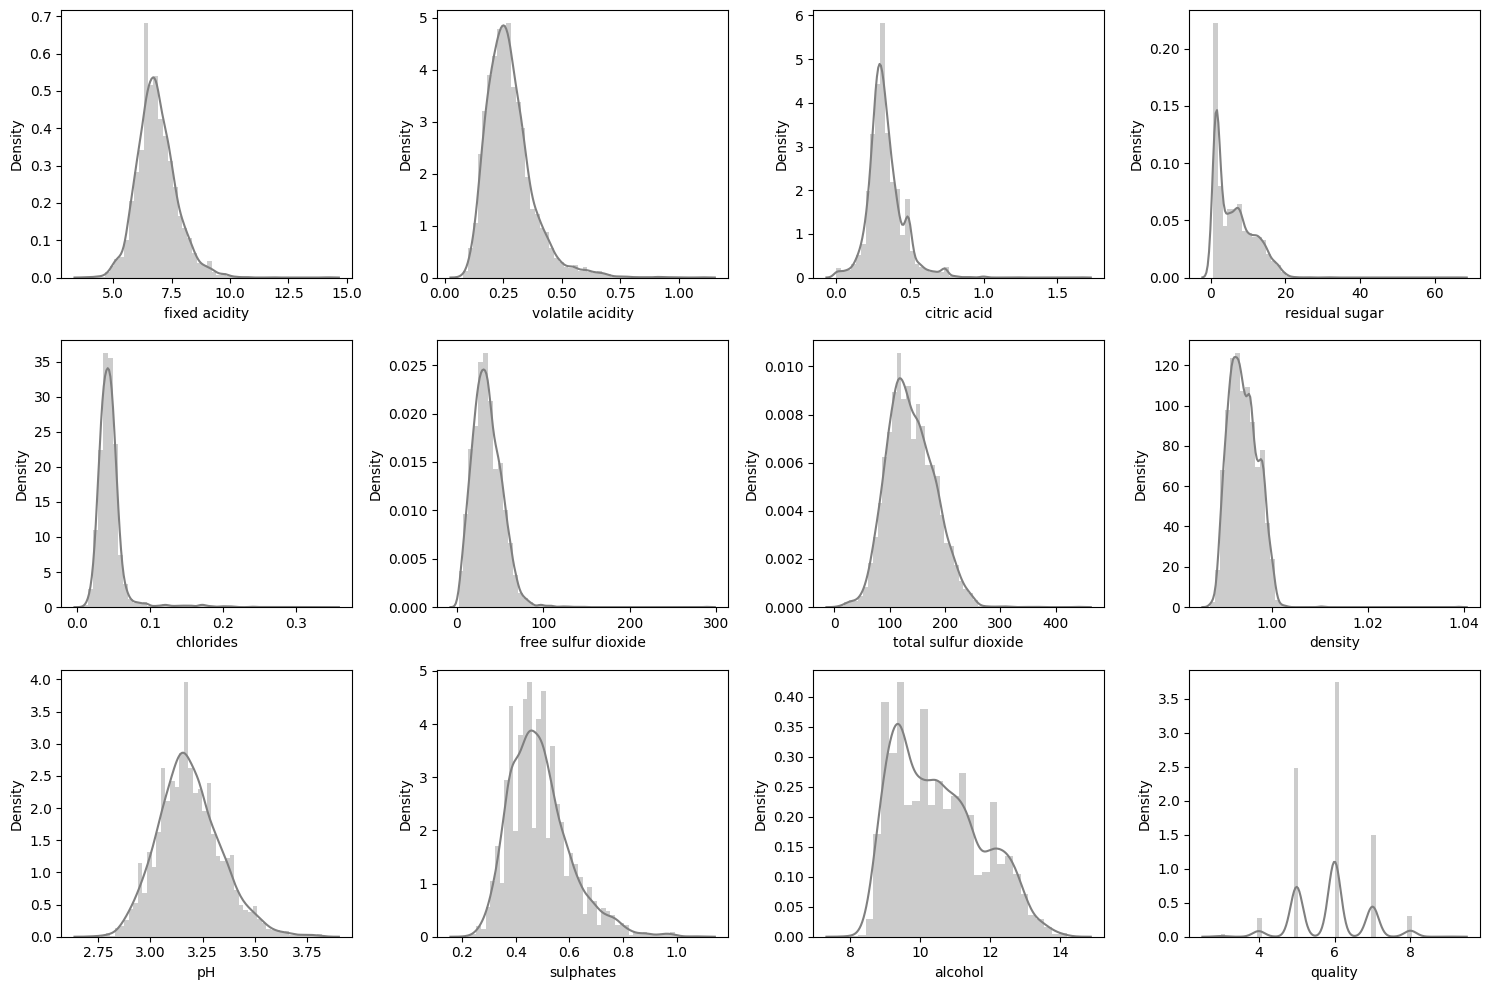

In [11]:
plt.figure(figsize = (15,10))

for i in range(1,13):
    plt.subplot(3,4,i)
    sns.distplot(white[white.columns[i]], color='gray')
    plt.tight_layout()

#### Overall Distributions

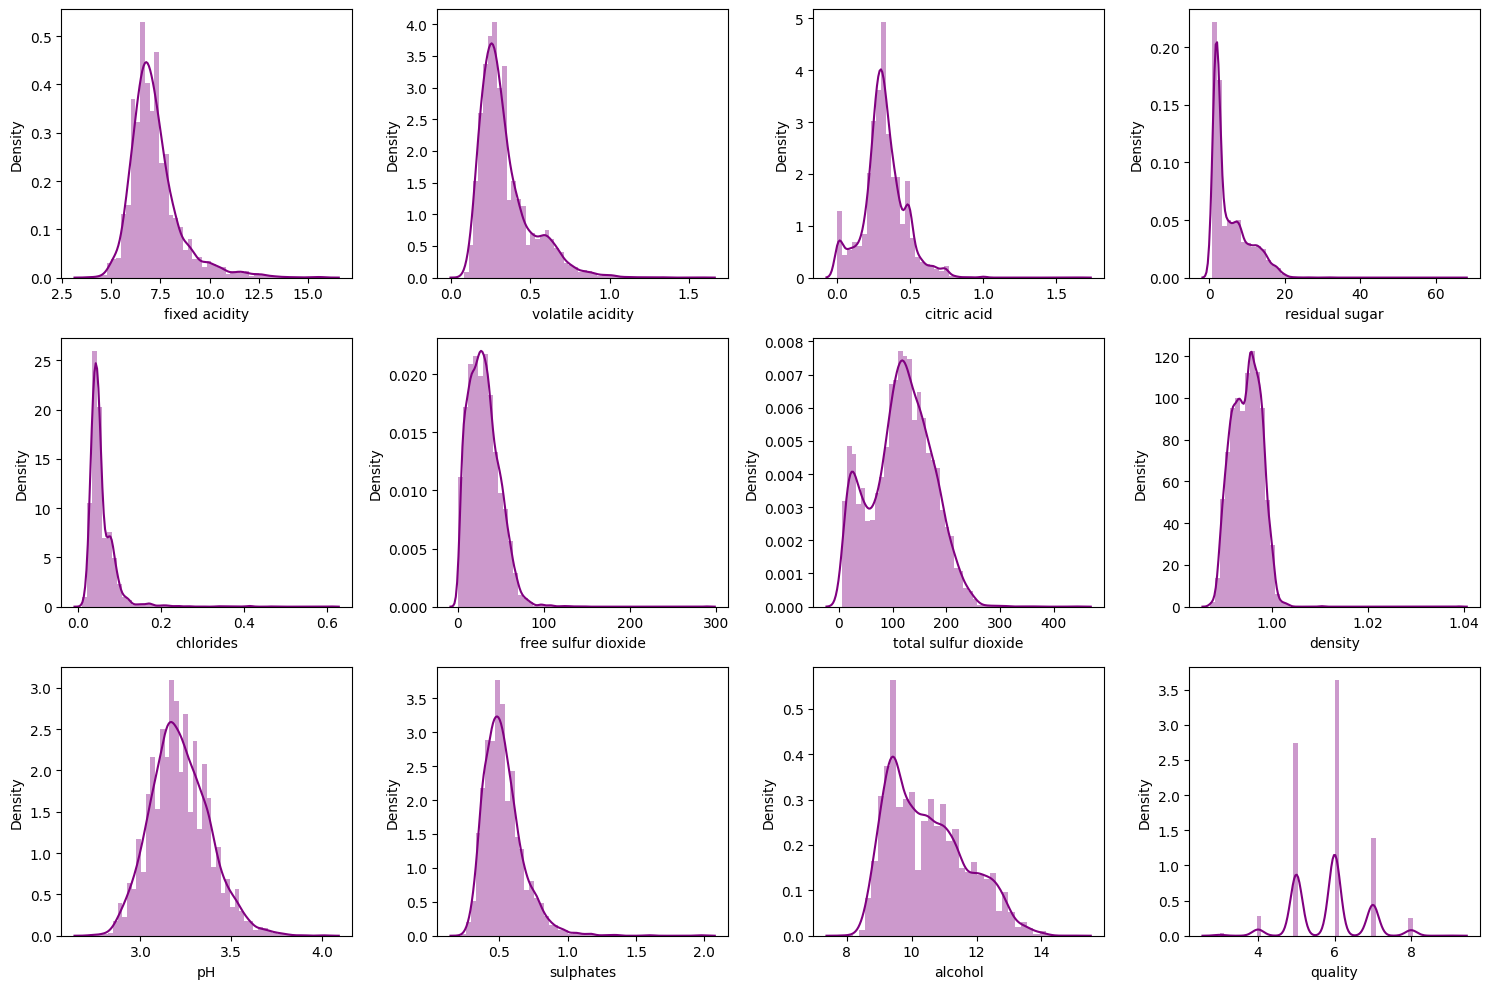

In [12]:
plt.figure(figsize = (15,10))

for i in range(1,13):
    plt.subplot(3,4,i)
    sns.distplot(wine[wine.columns[i]],color='purple')
    plt.tight_layout()

The above distribution plots point to outliers being present in our dataset. We will keep this in mind for later when we are ready to build our models. 

## Ranking Quality Scores

In this section we will split the 'quality' column into 3 bins labeled 'Low', 'Medium', and 'High' and each value of 'quality' will receive a corresponding label.

In [13]:
group_names=['Low','Medium','High']
bin = pd.cut(wine['quality'], 3, labels=group_names)
wine['quality'] = bin
wine

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,Red,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,Low
1,Red,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,Low
2,Red,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,Low
3,Red,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,Medium
4,Red,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,White,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,Medium
6493,White,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,Low
6494,White,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,Medium
6495,White,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,Medium


In [14]:
wine['quality'].value_counts()

Medium    3915
Low       2384
High       198
Name: quality, dtype: int64

This split for the quality scores makes sense as it makes high ranking wines few and far between while the large majority of the dataset is Medium to Low rank. 

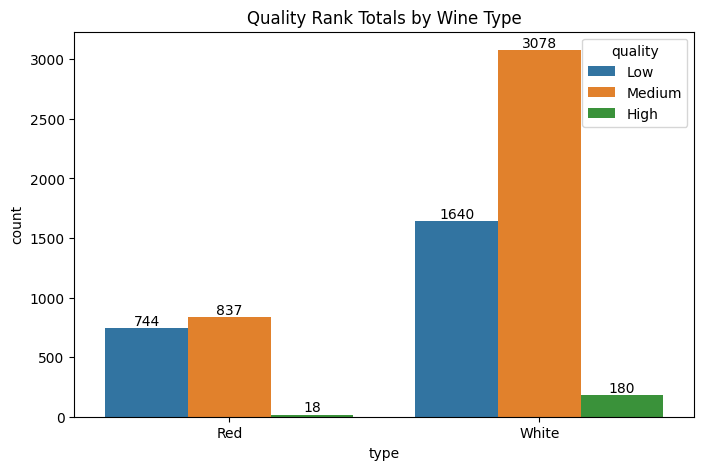

In [15]:
plt.figure(figsize=(8,5))

counts = sns.countplot(x = 'type', hue = 'quality', data = wine)
for container in counts.containers:
    counts.bar_label(container)
plt.title('Quality Rank Totals by Wine Type')    
plt.show()

## Transforming Categorical Features 

Now that we have ranked our quality scores we can create dummy variables for this column and the 'type' column in order to have a completely numeric dataset for our classification models. 

Reassignment for quality ranks ... 

In [16]:
quality = {"Low" : 0,"Medium": 1,"High" : 2}
wine["quality"] =  wine["quality"].map(quality)
wine.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,Red,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,Red,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,Red,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,Red,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1
4,Red,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


Reassignment for wine type ... 

In [17]:
type_ = {"Red" : 0, "White": 1}
wine["type"] =  wine["type"].map(type_)
wine.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,0,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,0,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,0,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1
4,0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


## Split and Scale 

This split will be used to predict quality ... 

In [18]:
X = wine.drop(['quality'],axis=1)
Y = wine['quality']

And this split will be used to predict type ... 

In [19]:
X2 = wine.drop(['type'],axis=1)
Y2 = wine['type']

In [20]:
scaler = preprocessing.MinMaxScaler()
minmax_df = scaler.fit_transform(X)
X = pd.DataFrame(minmax_df, columns=X.columns)

In [21]:
minmax_df2 = scaler.fit_transform(X2)
X2 = pd.DataFrame(minmax_df2, columns = X2.columns)

We began here by splitting our dataset into independent (X) and dependent (Y) variables to fit onto our models. 

After having done this we scaled the independent variables, this means that the data was transformed so that it all fits within a specific scale like, in this case, 0-1. This will be useful for our data since our features exhibit a wide range of values. For example, the highest value for Total Sulfur Dioxide was 440 but for Chlorides the highest value was a mere 0.6.

By scaling our variables, it will help compare different variables on equal footing while also improve the performance of our machine learning algorithms, as they often perform better with data that is in a common range.

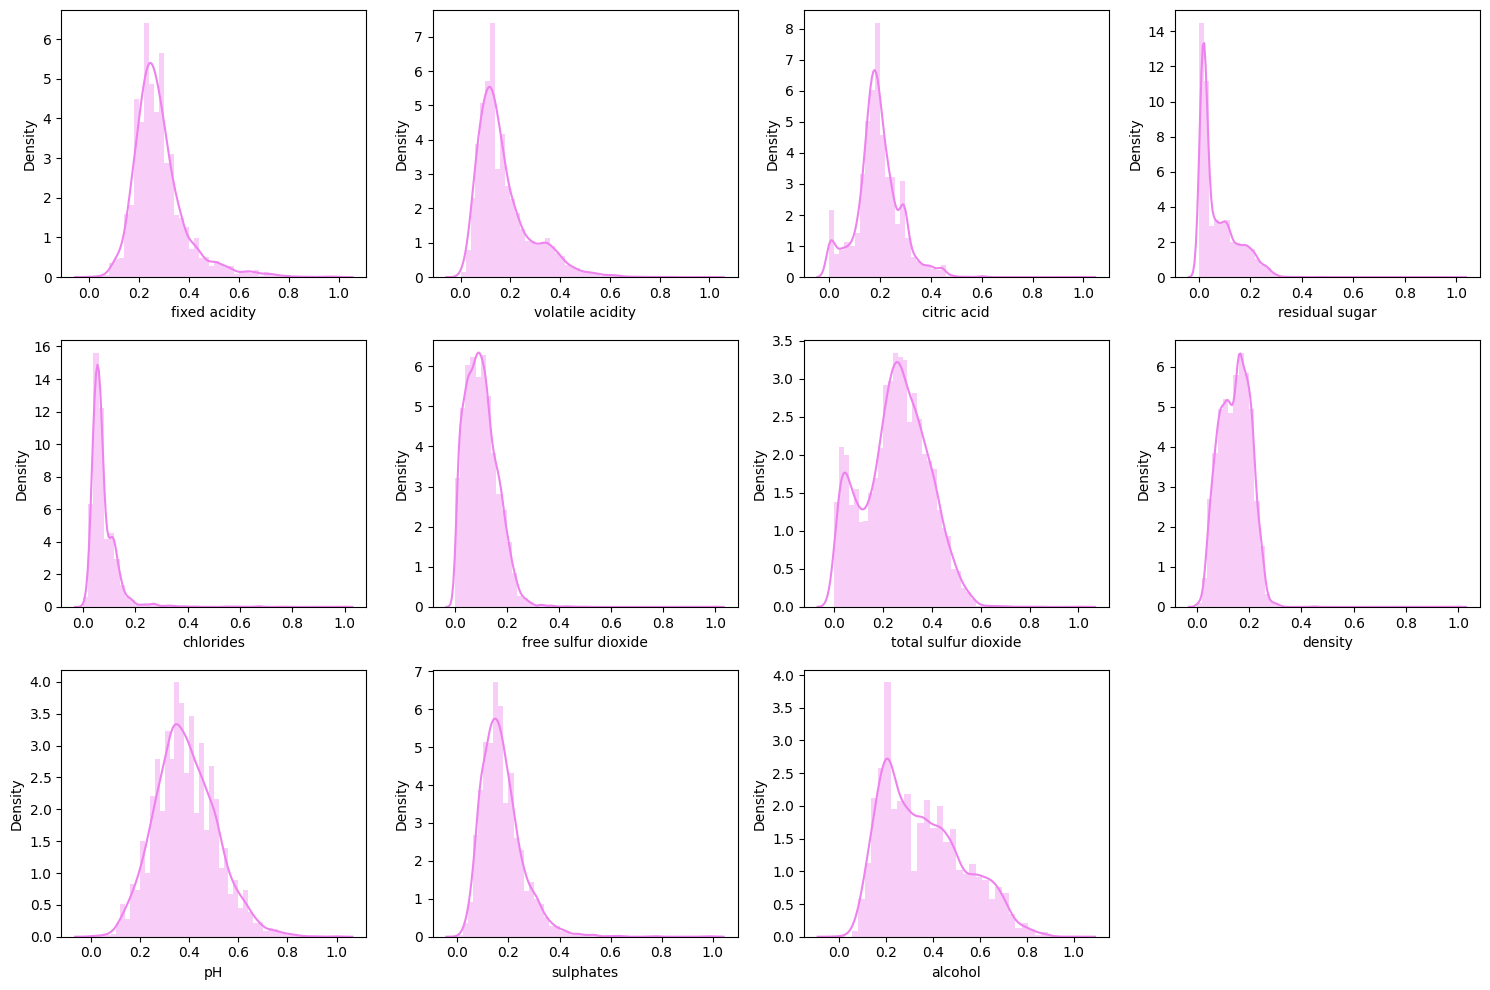

In [22]:
plt.figure(figsize = (15,10))

for i in range(1,12):
    plt.subplot(3,4,i)
    sns.distplot(X[X.columns[i]],color='violet')
    plt.tight_layout()

^ here we can see that all values for each feature falls between 0 and 1. 

Now we will split the independent and dependent variables into training and test sets for our models. 

In [23]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, random_state = 0)

In [24]:
X2_train, X2_test, Y2_train, Y2_test = train_test_split(X2,Y2, test_size = 0.2, random_state = 0)

80% of our data will be used to train our models and the remaining 20% will be used for testing. 

In [25]:
print("The shape of X_train is:", X_train.shape)
print("The shape of X_test is:", X_test.shape)
print("The shape of Y_train is:", Y_train.shape)
print("The shape of Y_test is:", Y_test.shape)

The shape of X_train is: (5197, 12)
The shape of X_test is: (1300, 12)
The shape of Y_train is: (5197,)
The shape of Y_test is: (1300,)


In [26]:
print("The shape of X_train is:", X2_train.shape)
print("The shape of X_test is:", X2_test.shape)
print("The shape of Y_train is:", Y2_train.shape)
print("The shape of Y_test is:", Y2_test.shape)

The shape of X_train is: (5197, 12)
The shape of X_test is: (1300, 12)
The shape of Y_train is: (5197,)
The shape of Y_test is: (1300,)


## Predictive Models for Wine Quality

Finally, we have arrived at the best part. We will begin to build and tune our predictive models here.

For this project I will focus on four classification algorithms from the sklearn library : 
> * Logistic Regression
>* Support Vector Classifier
>* Decision Tree Classifier and
>* K-Neighbours Classifier

Before that lets build a function to plot the confusion matrix for each model as we go along for better visualization. 

In [27]:
def plot_confusion_matrix(y,y_predict):
    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, cmap='coolwarm',annot=True,fmt = " ", ax = ax);
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['Low','Medium','High']); ax.yaxis.set_ticklabels(['Low','Medium','High'])

### Logistic Regression

In [28]:
lr = LogisticRegression()
lr.fit(X_train,Y_train)
accuracy = lr.score(X_test, Y_test)
print('Log Regression Accuracy:',(accuracy*100).round(2),'%')

Log Regression Accuracy: 70.69 %


Our Logisitic Regression model gave us a preliminary accuracy score of 70.69%, which is quite low. Let's tune our model to see if we can improve on that number.

In [29]:
lr_params = {'C':[0.01,0.1,1],
             'penalty':['l1','l2','elasticnet'],
             'solver':['liblinear','lbfgs','newton-cg', 'sag', 'saga']}

logreg_cv = GridSearchCV(lr,lr_params,cv=5)
logreg_cv.fit(X_train, Y_train)
print("Best Parameters :",logreg_cv.best_params_)
print("GridSearch Score :",(logreg_cv.best_score_*100).round(2),'%')

Best Parameters : {'C': 1, 'penalty': 'l2', 'solver': 'lbfgs'}
GridSearch Score : 71.48 %


In [30]:
y_predict=logreg_cv.best_estimator_.predict(X_test)

print("Tuned Logistic Regression Model Accuracy:", 
     (accuracy_score(Y_test, y_predict)*100).round(2),'%')

Tuned Logistic Regression Model Accuracy: 70.69 %


Our tuned model returned the same preliminary score and below is the confusion matrix for the 1300 samples in the test set. 

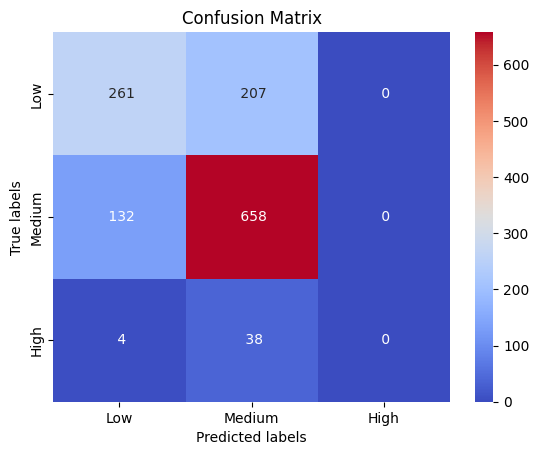

In [31]:
plot_confusion_matrix(Y_test,y_predict)

### Support Vector Machine

In [32]:
svm = SVC()
svm.fit(X_train,Y_train)
accuracy = svm.score(X_test, Y_test)
print('Support Vector Accuracy:',(accuracy*100).round(2),'%')

Support Vector Accuracy: 72.0 %


Our Support Vector model gave us a preliminary accuracy score of 72%, which is slightly better than the Log Regression model but still low. Let's tune our model to see if we can improve on that number.

In [33]:
svm_params = {'C':[0.01,0.1,1],
              'kernel':['linear', 'rbf','poly','sigmoid'],
              'degree':[2,3,4,5],
              'decision_function_shape':['ovo', 'ovr'],
              'gamma':[0.01,0.1,1.0]}

svm_cv = GridSearchCV(svm,svm_params,cv=5)
svm_cv.fit(X_train, Y_train)
print("Best Parameters :",svm_cv.best_params_)
print("GridSearch Score:",(svm_cv.best_score_*100).round(2),'%')

Best Parameters : {'C': 1, 'decision_function_shape': 'ovo', 'degree': 5, 'gamma': 1.0, 'kernel': 'poly'}
GridSearch Score: 72.46 %


In [34]:
y_predict=svm_cv.best_estimator_.predict(X_test)

print("Tuned Logistic Regression Model Accuracy:", 
     (accuracy_score(Y_test, y_predict)*100).round(2),'%')

Tuned Logistic Regression Model Accuracy: 71.77 %


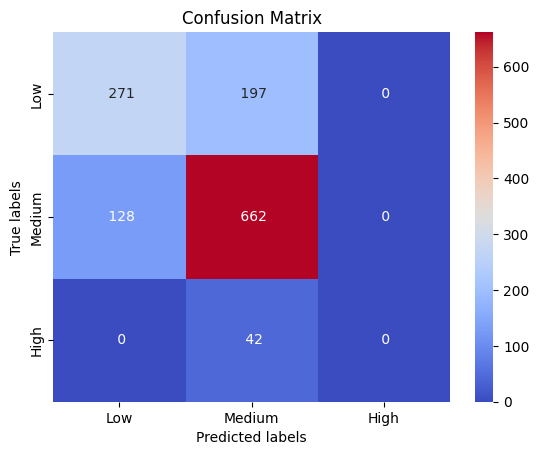

In [35]:
plot_confusion_matrix(Y_test,y_predict)

### Decision Tree 

In [36]:
tree = DecisionTreeClassifier()
tree.fit(X_train,Y_train)
accuracy = tree.score(X_test, Y_test)
print('Decision Tree Accuracy:',(accuracy*100).round(2),'%')

Decision Tree Accuracy: 73.31 %


Our decision tree model gave us a slightly higher preliminary accuracy score than the previous two models but we are still stuck in the low 70's. 

In [37]:
tree_params = {'criterion':['gini','entropy','log_loss'],
               'splitter': ['best', 'random'],
               'max_depth': ['None',2, 4, 6, 8, 10, 12, 14, 16, 18, 20],
               'min_samples_split': [2, 4, 6, 8, 10, 12, 14, 16, 18, 20],
               'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8 , 9, 10, 11, 12, 13, 14, 15, 16],
               'max_features': ['auto', 'sqrt','log2']}

tree_cv = GridSearchCV(tree,tree_params,cv=5)
tree_cv.fit(X_train, Y_train)

print("Best Parameters :",tree_cv.best_params_)
print("GridSearch Score :",(tree_cv.best_score_*100).round(2),'%')

Best Parameters : {'criterion': 'log_loss', 'max_depth': 18, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'}
GridSearch Score : 72.62 %


In [38]:
y_predict = tree_cv.best_estimator_.predict(X_test)
print("Tuned Decision Tree Model Accuracy:", 
     (accuracy_score(Y_test, y_predict)*100).round(2),'%')

Tuned Decision Tree Model Accuracy: 74.92 %


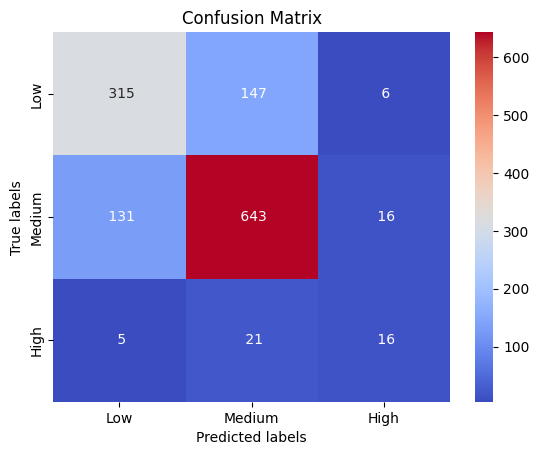

In [39]:
plot_confusion_matrix(Y_test,y_predict)

### K-Nearest-Neighbors 

In [40]:
KNN = KNeighborsClassifier()
KNN.fit(X_train,Y_train)
accuracy = KNN.score(X_test, Y_test)
print('KNN Model Accuracy:',(accuracy*100).round(2),'%')

KNN Model Accuracy: 71.0 %


In [41]:
knn_params = {'n_neighbors': list(range(1,50)),
              'weights':['uniform','distance'],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'p': [1,2]}
knn_cv = GridSearchCV(KNN,knn_params,cv=10)
knn_cv.fit(X_train, Y_train)
print("Best Parameters :",knn_cv.best_params_)
print("GridSearch Score :",(knn_cv.best_score_*100).round(2),'%')

Best Parameters : {'algorithm': 'auto', 'n_neighbors': 18, 'p': 1, 'weights': 'distance'}
GridSearch Score : 79.85 %


In [42]:
y_predict=knn_cv.best_estimator_.predict(X_test)

print("Tuned K-Neighbors model accuracy:", 
     ( accuracy_score(Y_test, y_predict)*100).round(2),'%')

Tuned K-Neighbors model accuracy: 78.46 %


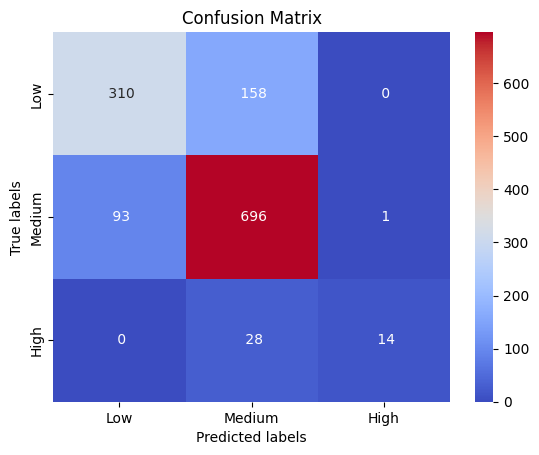

In [43]:
plot_confusion_matrix(Y_test,y_predict)

### Comparisons 

Between the four models, the best one to predict wine quality was the K-Nearest-Neigbors classifier after tuning. 

In [44]:
mods = {'LogReg':[lr.score(X_test, Y_test),logreg_cv.score(X_test, Y_test)],'SVM':[svm.score(X_test,Y_test),svm_cv.score(X_test, Y_test)],'Tree':[tree.score(X_test,Y_test),tree_cv.score(X_test, Y_test)],'KNN':[KNN.score(X_test,Y_test),knn_cv.score(X_test, Y_test)]}
scores = pd.DataFrame.from_dict(mods,orient='index', columns=['Initial Model','Tuned Model'])
scores

,Initial Model,Tuned Model
LogReg,0.706923,0.706923
SVM,0.720000,0.717692
Tree,0.733077,0.749231
KNN,0.710000,0.784615


<AxesSubplot: >

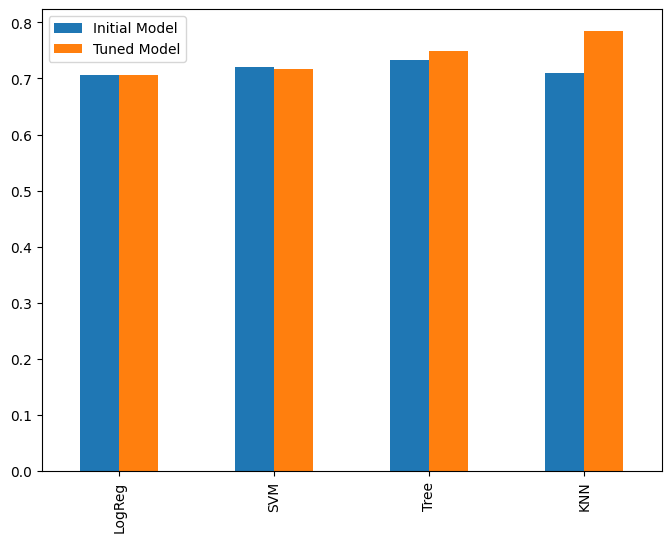

In [45]:
scores.plot.bar(figsize=(8,6))

## Predictive Models for Wine Type

In [46]:
def plot_confusion_matrix2(y,y_predict):
    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, cmap='coolwarm',annot=True,fmt = " ", ax = ax);
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['Red','White']); ax.yaxis.set_ticklabels(['Red','White'])

### Logistic Regression

In [47]:
lr = LogisticRegression()
lr.fit(X2_train,Y2_train)
lr_accuracy = lr.score(X2_test, Y2_test)
print('Log Regression Accuracy:',(lr_accuracy*100).round(2),'%')

Log Regression Accuracy: 98.92 %


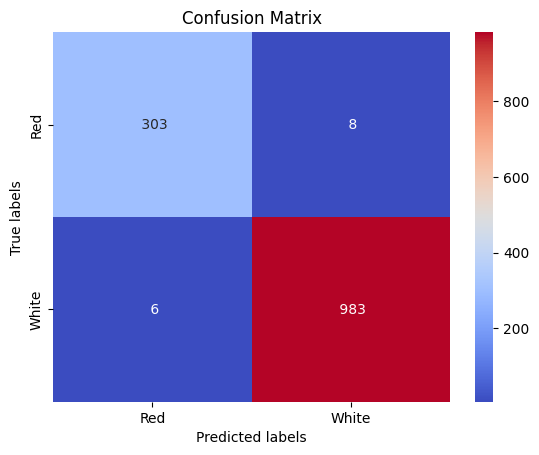

In [48]:
y_predict = lr.predict(X2_test)
plot_confusion_matrix2(Y2_test,y_predict)

Here we can see that our Log Regression model gave us a fantastic score of 98.92%, accurately predicting 1,286 samples out of 1,300. With a score like this, there is no need to tune our model or to even train any other ones. However, we will continue on with other models to see what scores we get and also, just for fun.

### Support Vector Machine

In [49]:
svm = SVC()
svm.fit(X2_train,Y2_train)
svm_accuracy = svm.score(X2_test, Y2_test)
print('Support Vector Accuracy:',(svm_accuracy*100).round(2),'%')

Support Vector Accuracy: 99.46 %


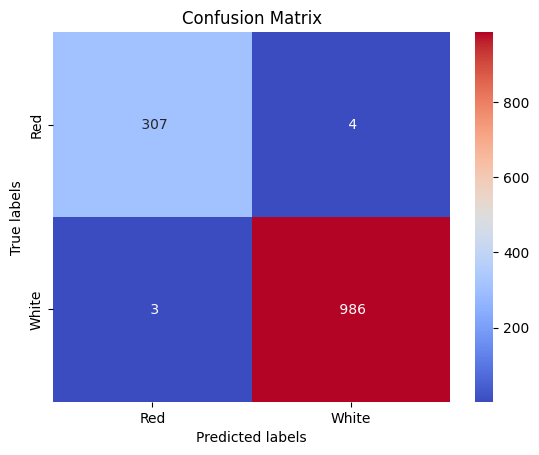

In [50]:
y_predict = svm.predict(X2_test)
plot_confusion_matrix2(Y2_test,y_predict)

### Decision Tree

In [51]:
tree = DecisionTreeClassifier()
tree.fit(X2_train,Y2_train)
tree_accuracy = tree.score(X2_test, Y2_test)
print('Decision Tree Accuracy:',(tree_accuracy*100).round(2),'%')

Decision Tree Accuracy: 98.31 %


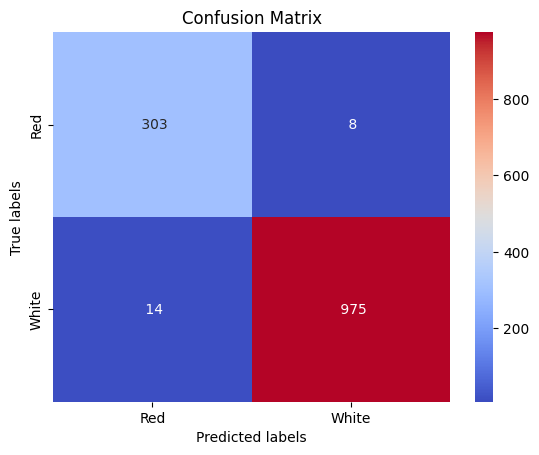

In [52]:
y_predict = tree.predict(X2_test)
plot_confusion_matrix2(Y2_test,y_predict)

### K-Nearest-Neighbors

In [53]:
KNN = KNeighborsClassifier()
KNN.fit(X2_train,Y2_train)
KNN_accuracy = KNN.score(X2_test, Y2_test)
print('KNN Model Accuracy:',(KNN_accuracy*100).round(2),'%')

KNN Model Accuracy: 99.08 %


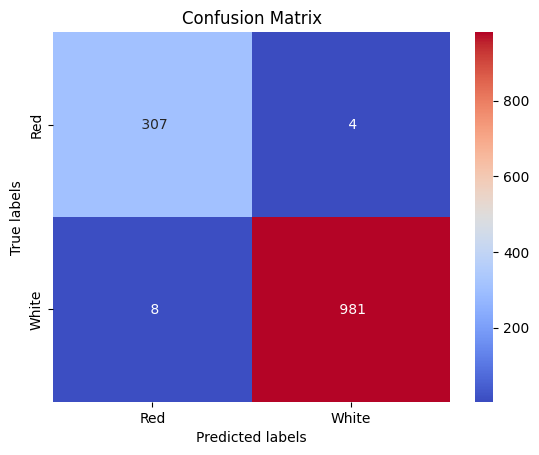

In [54]:
y_predict = KNN.predict(X2_test)
plot_confusion_matrix2(Y2_test,y_predict)

### Comparisons 

In [55]:
mods = {'LogReg':[(lr_accuracy*100)],'SVM':[(svm_accuracy*100)],'Tree':[(tree_accuracy*100)],'KNN':[(KNN_accuracy*100)]}
types = pd.DataFrame.from_dict(mods,orient='index', columns=['Accuracy'])
types

,Accuracy
LogReg,98.923077
SVM,99.461538
Tree,98.307692
KNN,99.076923


The best model for predicting wine types is our Support Vector Classifier with a score of 99.46 %